Our team:
Максим Куценко,
Володимир Бронецький,
Кардаш Олександр,
Булешний Михайло.

Our topic (Goal): Study the crime index, the factors that influence it and the characteristic features of countries with high crime rates and low.
A lot of data was used for the analysis
1) Crimes and crime index corresponding to each
2) General information about each country
3) Psychological tests in each country
4) The average age of the population in each country
5) Type of the country's system
6) Religion in every country
7) Alcohol consumption statistics


First of all we need to import modules.

In [1]:
import pandas as pd
import math
import seaborn as sns

Here we determine function to add new column from another dataframe

In [27]:
# Determine function
def add_column(row,column,data_frame):
    """
    Adds new column to row from another dataframe
    """
    buf=data_frame.loc[data_frame["Country"]==row["Country"][:-1]][column].values
    if len(buf)!=0:
        row[column]=buf[0]
    else:
        row["Crime rate"]=math.nan
    return row

We need to implement some functions to make countries_general dataFrame more comfortable to use.

In [34]:
"""
Initialize some help functions
"""
def read_data(path_to_file):
    """
    Reads data from file with "path_to_file" path
    """
    return pd.DataFrame(data=pd.read_csv(path_to_file,sep=","))
def tonumeric(row,all_columns):
    """
    Converts every value to int
    (Because standart data_frame has not valid items to compare)
    """
    for column in all_columns:
        row[column]=float(str(row[column]).replace(",","."))
    return row

Here we want to read data and add crime rate column to our dataFrame with general characteristics.

In [23]:
# We take dataframe and convert all values to int (Replacing "," on ".")
# Then add new column Crime rate to every country
# Generally we prepare data to use them conveniently
crime_rate_dta=read_data("data\\countries_crime.csv")
def new_data(row):
    """
    Adds new Crime rate column to dataframe.
    """
    row["Population"]=round(row["Population"]/1000000,2)
    index=crime_rate_dta.loc[crime_rate_dta["Country"]==row["Country"][:-1]]["Crime Index"].values
    if len(index) :
        row["Crime rate"]=index[0]
    else:
        row["Crime rate"]=math.nan
    return row
all_columns=["Population","Area (sq. mi.)","Pop. Density (per sq. mi.)","Coastline (coast/area ratio)","Net migration","Infant mortality (per 1000 births)","GDP ($ per capita)","Literacy (%)","Phones (per 1000)","Arable (%)","Crops (%)","Other (%)","Climate","Birthrate","Deathrate","Agriculture","Industry","Service"]
country_with_crime_index = read_data("data\countries of the world.csv")
country_with_crime_index=country_with_crime_index.apply(new_data,axis="columns")
country_with_crime_index=country_with_crime_index.loc[country_with_crime_index["Crime rate"].notna()]
country_with_crime_index = country_with_crime_index.apply(lambda row:tonumeric(row,all_columns),axis="columns")


From that point we want to start our research

First of all we took 5 countries with the biggest index and 5 with smallest found avarege values of every block
and compare characteristics(Indexes or percentege) that are not influenced because of size or population etc.

In [24]:
# Here we try to chose 5 countries with the biggest crime rate and the lowest.
# We compare few criteria that are indexes or percenteges.
top_crime_name=["Papua New Guinea ","Venezuela ","Afghanistan ","South Africa ","Honduras "]
top_safety_name=["Switzerland","Isle Of Man ","Taiwan ","United Arab Emirates ","Qatar "]
top_crime=country_with_crime_index.loc[country_with_crime_index["Country"].isin(top_crime_name)]
top_safety=country_with_crime_index.loc[country_with_crime_index["Country"].isin(top_safety_name)]
top_crime.set_index("Country")
top_safety.set_index("Country")
difference = top_safety.mean()-top_crime.mean()
shows_difference=["Pop. Density (per sq. mi.)","GDP ($ per capita)","Literacy (%)","Phones (per 1000)","Birthrate","Deathrate"]
difference[shows_difference]


C:\Users\Admin\AppData\Local\Temp\ipykernel_11520\3956495347.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  difference = top_safety.mean()-top_crime.mean()


Pop. Density (per sq. mi.)      211.680000
GDP ($ per capita)            18500.000000
Literacy (%)                     14.180000
Phones (per 1000)               367.026667
Birthrate                       -12.528667
Deathrate                        -6.758000
dtype: float64

The most important thing is that the GDP per person has the greatest influence on the crime index, the lower it is, the more crimes are committed. Average GDP per capita values ​​differ by a little more than $18,500. As a result, we have a relationship between the number of phones per 1,000 people and the level of crime. On average, the number of phones differs by 367 units per 1,000 people in favor of safer countries.
It is impossible not to mention that in dangerous countries we have high rates of birth and death rates as well.

But we can't say that all of that influence our crime rate. This criteria definitely have correlation but that can also meen that some third criteria can influence previous two. For example birthrate dont't influence on crime rate and vice versa crime rate dont't influence on birthrate.Some third criteria influence both of them.

Our research we want to split into two parts.
1)Criterias that influence crime rate
2)Factors that characterize countries with a high and low level of crime.

What currently influence crime index in countries:
1) Economy(GDP ($ per capita))
2) Law(Goverment type)
3) Religion

Firstly we have money
Here we compare crime index and GDP ($ per capita)

<AxesSubplot: xlabel='Crime rate', ylabel='GDP ($ per capita)'>

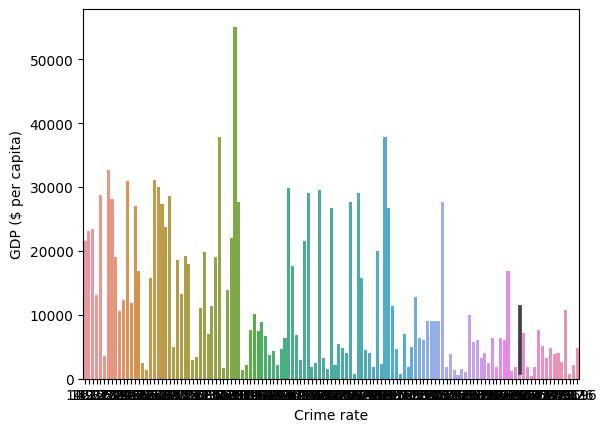

In [3]:
# Here we compare GDP ($ per capita) and Crime rate
sns.barplot(y="GDP ($ per capita)",x="Crime rate",data=country_with_crime_index)

As result we see clear influence an correlation.
As consequence we are going to see the same when compare Phones (per 1000) to crime index.


<AxesSubplot: xlabel='Crime rate', ylabel='Phones (per 1000)'>

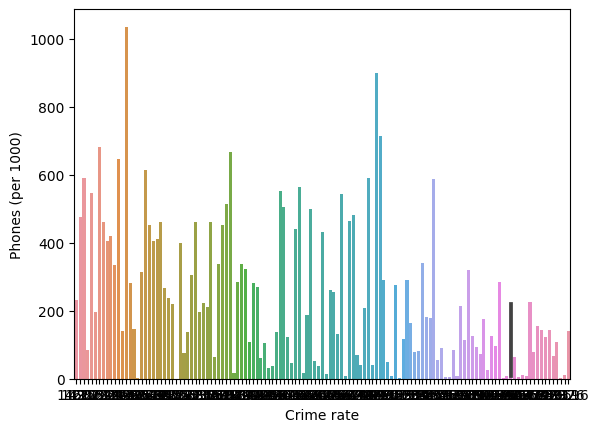

In [28]:
# Here we compare Phones (per 1000) and Crime rate
sns.barplot(y="Phones (per 1000)",x="Crime rate",data=country_with_crime_index)

Here we dicided to check what countrie has more than 1000 phones per 1000 persons.

In [26]:
# Get the country that has more than 1000 phones per 1000 person
country = country_with_crime_index.loc[country_with_crime_index["Phones (per 1000)"].idxmax()].loc[["Country","Phones (per 1000)"]]
country

Country              Monaco 
Phones (per 1000)     1035.6
Name: 138, dtype: object

That is Monaco that has 1035 phone per 1000 persons.

Also, as it was mentioned, we saw that population density has correlation with crime index.
So we decided to compare crime rate with population density.

<AxesSubplot: xlabel='Crime rate', ylabel='Pop. Density (per sq. mi.)'>

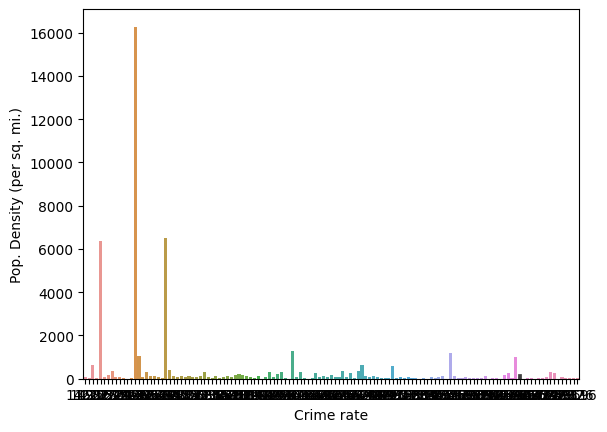

In [29]:
# Here we compare Pop. Density (per sq. mi.) and Crime rate
sns.barplot(y="Pop. Density (per sq. mi.)",x="Crime rate",data=country_with_crime_index)

As result we see that countries with huge population density have the lowest crime rate.
We decided to get their names

In [31]:
# Here we try to get countries with the biggest population density.
countries_big_density=country_with_crime_index.loc[country_with_crime_index["Pop. Density (per sq. mi.)"]>=2000]
countries_big_density.loc[["Country","Pop. Density (per sq. mi.)"]]

91     Hong Kong 
138       Monaco 
184    Singapore 
Name: Country, dtype: object

That is Hong Kong, Monaco, Singapore.

Also religion has a great influence on crime rate.
We decided to compare religion type to crime index.

C:\Users\Admin\AppData\Local\Temp\ipykernel_11520\1561881663.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y="Religion",x="Crime rate",data=country_with_crime_index_religion.groupby("Religion").mean().reset_index())


<AxesSubplot: xlabel='Crime rate', ylabel='Religion'>

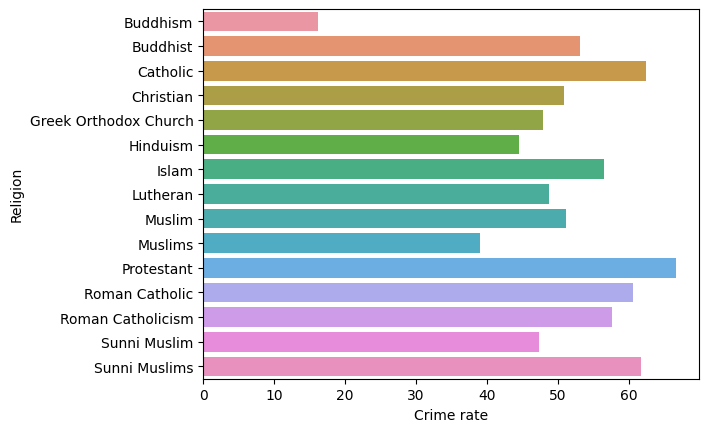

In [83]:

Religion_type = read_data("data\countries_religions.csv")
country_with_crime_index_religion=country_with_crime_index.apply(lambda x: add_column(x,"Religion",Religion_type),axis="columns")
country_with_crime_index_religion=country_with_crime_index_religion.loc[country_with_crime_index_religion["Religion"].notna()]
sns.barplot(y="Religion",x="Crime rate",data=country_with_crime_index_religion.groupby("Religion").mean().reset_index())


So countries with buddhism religion is the safest. Whereas countries with protestants religion has the biggest crime rate. 

Also goverment type influence a lot on crime rate.
We decided to compare goverment type to crime index.

C:\Users\Admin\AppData\Local\Temp\ipykernel_11520\1986737973.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y="System",x="Crime index",data=Goverment_type.groupby("System").mean().reset_index())


<AxesSubplot: xlabel='Crime index', ylabel='System'>

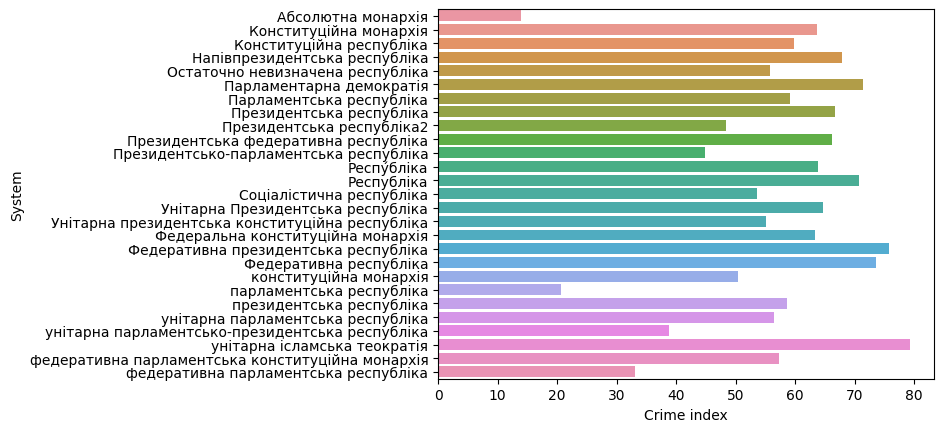

In [77]:
Goverment_type = read_data("data\countries_gov_type.csv")
sns.barplot(y="System",x="Crime index",data=Goverment_type.groupby("System").mean().reset_index())


And thats it. Here we can notice that avaragely countries with unitary Islamic theocracy have the biggest crime index. Whereas countries with absolute monarchy has the lowest avarage crime index.

So from that point we want to start our next part of research. We are going to show factors that characterize countries with a high and low level of crime index.

First of all we wanted to understand what region has the biggest avarege crime index.
We compared region to crime index.

C:\Users\Admin\AppData\Local\Temp\ipykernel_11520\2200601552.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y="Region",x="Crime rate",data=country_with_crime_index.groupby("Region").mean().reset_index())


<AxesSubplot: xlabel='Crime rate', ylabel='Region'>

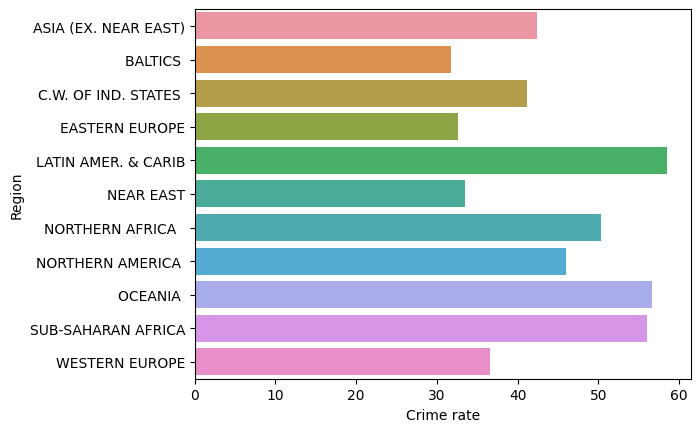

In [25]:
# Here we try find out what every region avarege crime rate is.
sns.barplot(y="Region",x="Crime rate",data=country_with_crime_index.groupby("Region").mean().reset_index())

As the result we see that the biggest crime rate has Latin America and Carib. The lowest Baltics.

Again to make sure that not only money influence crime rate. We decided to compare GDP ($ per capita) to regions.

C:\Users\Admin\AppData\Local\Temp\ipykernel_11520\1512519618.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y="Region",x="GDP ($ per capita)",data=country_with_crime_index.groupby("Region").mean().reset_index())


<AxesSubplot: xlabel='GDP ($ per capita)', ylabel='Region'>

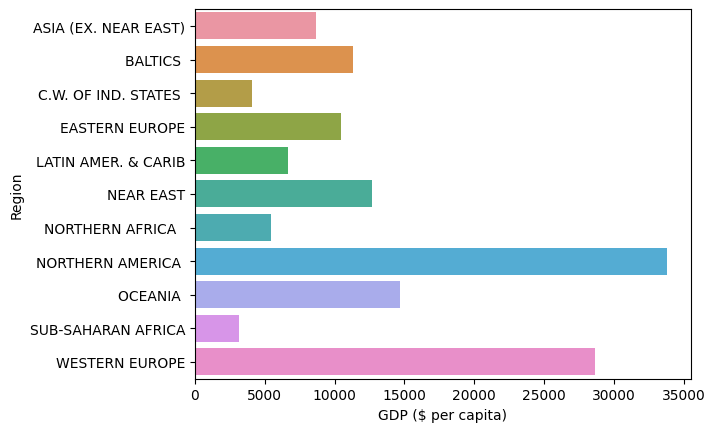

In [26]:
# Comparing also every region avarage GDP ($ per capita)
sns.barplot(y="Region",x="GDP ($ per capita)",data=country_with_crime_index.groupby("Region").mean().reset_index())
# Shows that not always a lack of determine crime rate

Latin America and Carib, that is the most dangerous, has quite low GDP ($per capita) but not the lowest. While Northern America has the biggest GDP ($per capita), but crime rate is also quite high.
So that proof that not only money influence crime index.

Here we decided to check how crime index corrilate with avarage age in every country

<AxesSubplot: xlabel='Crime rate', ylabel='Avarage age'>

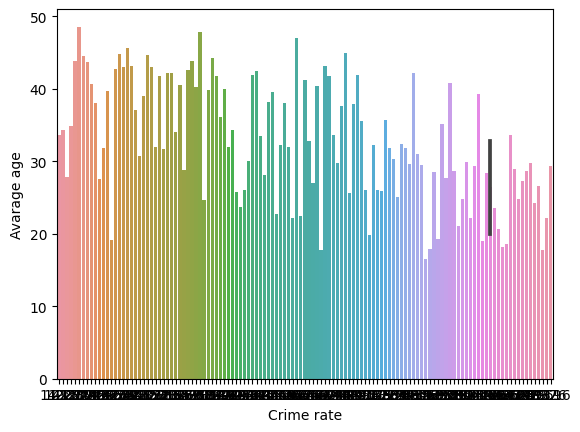

In [44]:
# Here we get new avarage age column from dataframe and add to our base
Age_datafrme = read_data("data\\avarege_age.csv")
country_with_crime_index_age_column=country_with_crime_index.apply(lambda x: add_column(x,"Avarage age",Age_datafrme),axis="columns")
country_with_crime_index_age_column=country_with_crime_index_age_column.loc[country_with_crime_index_age_column["Avarage age"].notna()]
# Here we compare Crime rate to avarage age
sns.barplot(x=country_with_crime_index_age_column["Crime rate"],y=country_with_crime_index_age_column["Avarage age"])

As result we see that countries with higher crime rate has small avarage age. And this is easy to explain because as it was mentioned before deathrate is higher in more dangerous countries.

At first glance comparing alcohol is trivial. But we decided to check different aspect of it.
The first is total consumption

In [46]:
# Here we get new Alcohol_consumption dataframe
Alcohol_consumption=read_data("data\\alchohol_test.csv")

<AxesSubplot: xlabel='Crime rate', ylabel='total_consumption'>

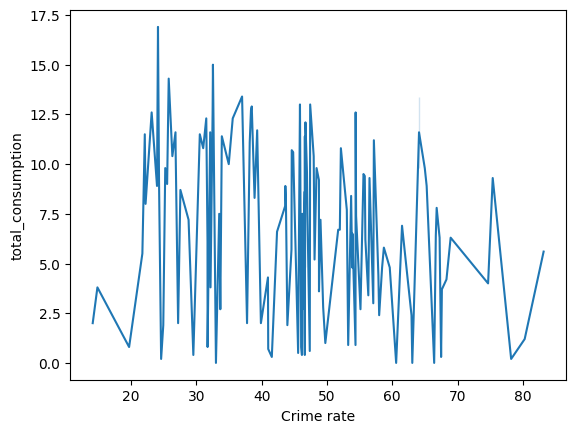

In [47]:
# Here we add new total_consumption column to base dataframe
# And compare total_consumption to Crime rate
country_with_crime_index_alcohol_column=country_with_crime_index.apply(lambda row : add_column(row,"total_consumption",Alcohol_consumption),axis="columns")
country_with_crime_index_alcohol_column=country_with_crime_index_alcohol_column.loc[country_with_crime_index_alcohol_column["total_consumption"].notna()]
sns.lineplot(y="total_consumption",x="Crime rate",data=country_with_crime_index_alcohol_column)

And result is very interesting. Countries with higher crime index drink less than more safe countries.

Also it is very interesting to check how percentage of drinking beer corrilate with crime index.

<AxesSubplot: xlabel='Crime rate', ylabel='beer_percentage'>

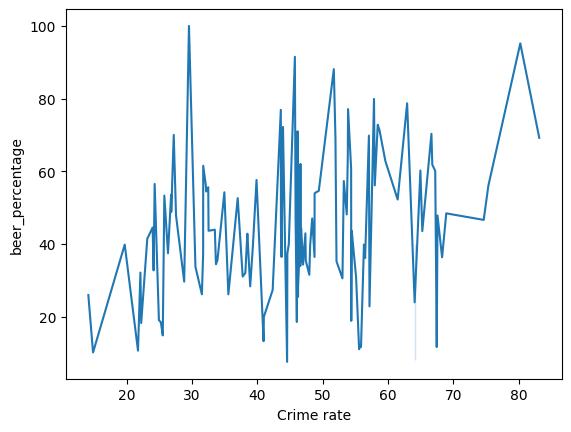

In [73]:
# Here we add new beer_percentage column to base dataframe
# And compare beer_percentage to Crime rate
country_with_crime_index_alcohol_column=country_with_crime_index.apply(lambda row : add_column(row,"beer_percentage",Alcohol_consumption),axis="columns")
country_with_crime_index_alcohol_column=country_with_crime_index_alcohol_column.loc[country_with_crime_index_alcohol_column["beer_percentage"].notna()]
sns.lineplot(y="beer_percentage",x="Crime rate",data=country_with_crime_index_alcohol_column)

As we see, dangerous countries drink beer more. This is easy to explain because beer is quite cheap type of alcohol.

Next is wine

<AxesSubplot: xlabel='Crime rate', ylabel='wine_percentage'>

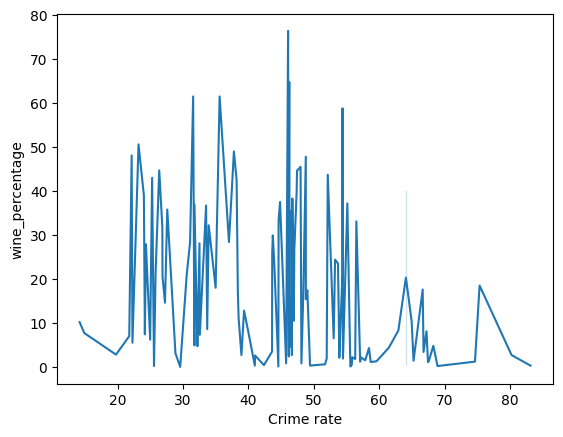

In [21]:
# Here we add new wine_percentage column to base dataframe
# And compare wine_percentage to Crime rate
country_with_crime_index_alcohol_column=country_with_crime_index.apply(lambda row : add_column(row,"wine_percentage",Alcohol_consumption),axis="columns")
country_with_crime_index_alcohol_column=country_with_crime_index_alcohol_column.loc[country_with_crime_index_alcohol_column["wine_percentage"].notna()]
sns.lineplot(y="wine_percentage",x="Crime rate",data=country_with_crime_index_alcohol_column)

And here we see that wine is usually drank more in safer countries. Wine is much more expensive and that is why in safer countries (quite rich ones) this percentege is bigger.

Here we decided to find countrie that is quite safe but still has very big beer percentege

In [13]:
# Here we get countries that are quite safe but also drink a lot of beer
country_with_crime_index_alcohol_column.loc[(country_with_crime_index_alcohol_column["beer_percentage"]>=90 )&(country_with_crime_index_alcohol_column["Crime rate"] <=50)]

,Agriculture,Arable (%),Area (sq. mi.),Birthrate,Climate,Coastline (coast/area ratio),Country,Crime rate,Crops (%),Deathrate,...,Infant mortality (per 1000 births),Literacy (%),Net migration,Other (%),Phones (per 1000),Pop. Density (per sq. mi.),Population,Region,Service,beer_percentage
29,0.036,0.57,5770.0,18.79,2.0,2.79,Brunei,29.55,0.76,3.45,...,12.61,93.9,3.59,98.67,237.2,65.8,0.38,ASIA (EX. NEAR EAST),0.403,100.0
219,0.209,19.97,329560.0,16.86,2.0,1.05,Vietnam,45.76,5.95,6.22,...,25.95,90.3,-0.45,74.08,187.7,256.1,84.40,ASIA (EX. NEAR EAST),0.381,91.5


This is Brunei where forbidden to sell alcohol.

Psychology tests

Now it is time to psychology tests.
And the first that is quite trivial is Generosity.

In [57]:
psychology_test=read_data("data\psychology_tests_1.csv")

<AxesSubplot: xlabel='Crime rate', ylabel='Generosity'>

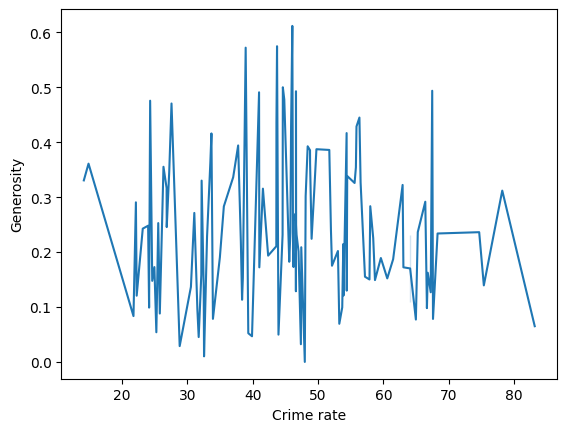

In [51]:
country_with_crime_index_psychology_column=country_with_crime_index.apply(lambda row : add_column(row,"Generosity",psychology_test),axis="columns")
country_with_crime_index_psychology_column=country_with_crime_index_psychology_column.loc[country_with_crime_index_psychology_column["Generosity"].notna()]
sns.lineplot(y="Generosity",x="Crime rate",data=country_with_crime_index_psychology_column)
# country_with_crime_index_psychology_column.loc[(country_with_crime_index_psychology_column["Happiness.Score"]<1.3)&(country_with_crime_index_psychology_column["Crime rate"]>10)]

The graph shows that usually people in safer countries is more generous.

The another aspect we wanted to cover is happines.

<AxesSubplot: xlabel='Crime rate', ylabel='Happiness.Score'>

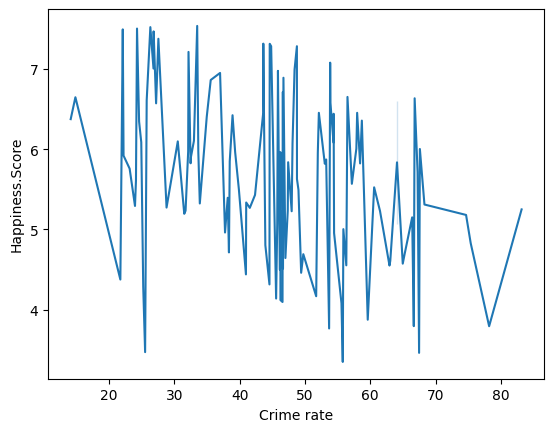

In [58]:
country_with_crime_index_psychology_column=country_with_crime_index.apply(lambda row : add_column(row,"Happiness.Score",psychology_test),axis="columns")
country_with_crime_index_psychology_column=country_with_crime_index_psychology_column.loc[country_with_crime_index_psychology_column["Happiness.Score"].notna()]
sns.lineplot(y="Happiness.Score",x="Crime rate",data=country_with_crime_index_psychology_column)

It is obviously than more dangerous countries have not so big happines score.

Another very interesting and unpredictable corrilation is perceptions of corruption

In [53]:
psychology_test=read_data("data\psychology_tests_2.csv")

<AxesSubplot: xlabel='Crime rate', ylabel='Perceptions of corruption'>

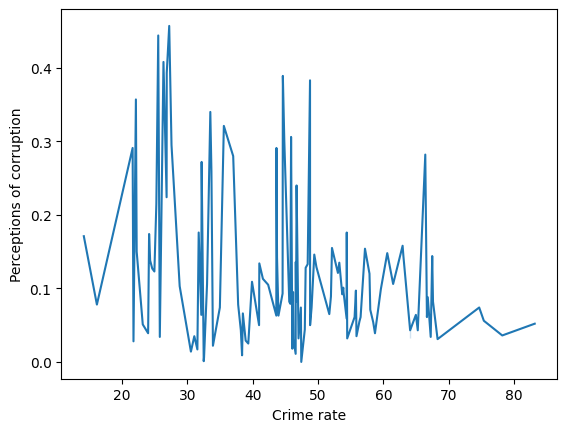

In [55]:
country_with_crime_index_psychology_column=country_with_crime_index.apply(lambda row : add_column(row,"Perceptions of corruption",psychology_test),axis="columns")
country_with_crime_index_psychology_column=country_with_crime_index_psychology_column.loc[country_with_crime_index_psychology_column["Perceptions of corruption"].notna()]
sns.lineplot(y="Perceptions of corruption",x="Crime rate",data=country_with_crime_index_psychology_column)

Very interesting result. It shows that safer countries percept corruption more.

Conclusion

What influence crime index:
1) Money 
2) Law
3) Religion

We can characterize countries with the highest crime rate as:
1) Small amount of money.
2) More likely to be situated in Latin America.
3) Small avarage lifetime.
4) Don't consume a lot of alcohol comparing to safer ones.
5) Drink more beer comparing to safer ones.
6) Perceive corruption not so strongly.
7) The inhabitants of these countries do not feel very happy.
8) The birthrate and deathrate is quite high.
9) More likely to have unitary Islamic theocracy.